# Week 8 - Advanced Machine Learning

During the course we have covered a variety of different tasks and algorithms. These were chosen for their broad applicability and ease of use with many important techniques and areas of study skipped. The goal of this class is to provide a brief overview of some of the latest advances and areas that could not be covered due to our limited time.

## Deep learning

![Basic neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/256px-Colored_neural_network.svg.png)
[Glosser.ca](https://commons.wikimedia.org/wiki/File%3AColored_neural_network.svg) via wikimedia. 

Although a [neural network](http://scikit-learn.org/dev/modules/neural_networks_supervised.html) has been added to scikit learn relatively recently it only runs on the CPU making the large neural networks now popular prohibitively slow. Fortunately, there are a number of different packages available for python that can run on a GPU. 

[Theano](https://github.com/Theano/Theano) is the GPGPU equivalent of numpy. It implements all the core functionality needed to build a deep neural network, and run it on the GPGPU, but does not come with an existing implementation.

A variety of packages have been built on top of Theano that enable neural networks to be implemented in a relatively straightforward manner. Parrallels can be draw with the relationship between numpy and scikit learn. [Pylearn2](http://deeplearning.net/software/pylearn2/) was perhaps the first major package built on Theano but has now been superseded by a number of new packages, including [blocks](https://blocks.readthedocs.org/en/latest), [keras](http://keras.io/), and [lasagne](https://lasagne.readthedocs.org/en/latest).

You may have also heard of [TensorFlow](http://tensorflow.org/) that was released by Google a year or two ago. TensorFlow lies somewhere between the low-level Theano and the high-level packages such as blocks, keras, and lasagne. Currently only keras supports TensorFlow as an alternative backend. Keras will also be included with TensorFlow soon.

Installing these packages with support for executing code on the GPU is more challenging than simply `conda install ...` or `pip install ...`. In addition to installing these packages it is also necessary to install the CUDA packages. 

Beyond the advances due to the greater computational capacity available on the GPU there have been a number of other important approaches utilized:

* [Convolutional neural nets](http://colah.github.io/posts/2014-07-Conv-Nets-Modular/)
* [Recurrent neural nets](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* Dropout
* Early stopping
* Data augmentation

![Convolutional neural network architecture](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)
[Aphex34](https://commons.wikimedia.org/w/index.php?title=User:Aphex34&action=edit&redlink=1) via wikimedia.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Keras and tensorflow can be installed using pip from the terminal.

`pip install tensorflow keras`

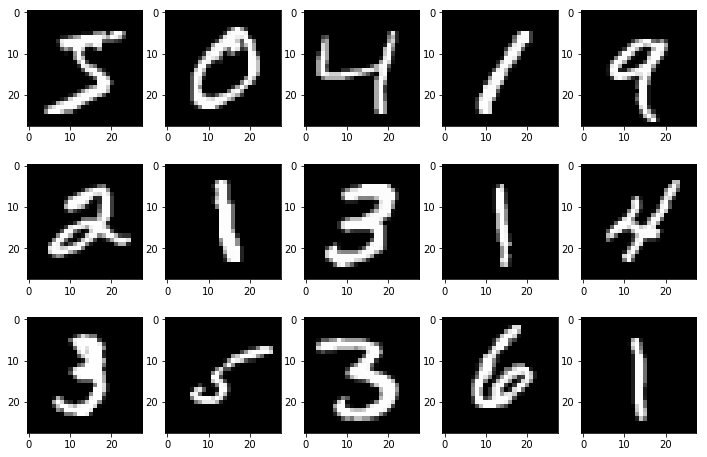

In [2]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], interpolation='nearest')
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 512
nb_classes = 10
nb_epoch = 10

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [18]:
X_train.shape

(60000, 1, 28, 28)

In [19]:
# CAUTION: Without utilizing a GPU even this very short example is incredibly slow to run.

model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape=(1,28,28), activation='relu'))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(8, input_dim=4*28*28*0.25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s - loss: 2.3018 - acc: 0.1122 - val_loss: 2.3007 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 88s - loss: 2.2985 - acc: 0.1222 - val_loss: 2.2917 - val_acc: 0.1217
Epoch 3/10
60000/60000 [==============================] - 87s - loss: 2.2039 - acc: 0.2029 - val_loss: 1.7418 - val_acc: 0.5455
Epoch 4/10
60000/60000 [==============================] - 87s - loss: 1.7882 - acc: 0.3357 - val_loss: 1.2699 - val_acc: 0.6516
Epoch 5/10
60000/60000 [==============================] - 88s - loss: 1.6274 - acc: 0.3768 - val_loss: 1.0988 - val_acc: 0.7110
Epoch 6/10
60000/60000 [==============================] - 88s - loss: 1.5566 - acc: 0.3961 - val_loss: 0.9946 - val_acc: 0.7416
Epoch 7/10
60000/60000 [==============================] - 94s - loss: 1.5153 - acc: 0.4054 - val_loss: 0.9617 - val_acc: 0.7559
Epoch 8/10
60000/60000 [==============================

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)

Test score: [0.85493929519653322, 0.81310000000000004]


In [21]:
predictions = model.predict_classes(X_test)

 9952/10000 [============================>.] - ETA: 0s

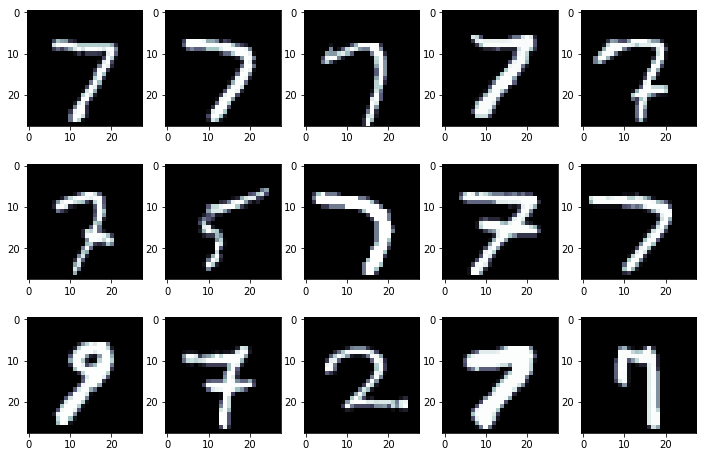

In [22]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[predictions == 7][i].reshape((28,28)), interpolation='nearest')
plt.show()

The performance here can still be improved. We really need to train with a larger network and for more epochs.

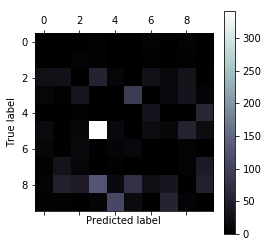

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, predictions)

np.fill_diagonal(cm, 0)

plt.bone()
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

We can also apply deep learning techniques to other tasks, for example the dimensionality reduction task we looked at last week.

A popular approach is an autoencoder. We will train a model with the goal of reconstructing the input. By itself this is not very useful but the hidden layers provide a compressed representation.

In [24]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(1, 28, 28))  # adapt this if using `channels_first` image data format

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [25]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 157s - loss: 0.0419 - val_loss: 0.0055
Epoch 2/10
60000/60000 [==============================] - 168s - loss: 0.0044 - val_loss: 0.0042
Epoch 3/10
60000/60000 [==============================] - 339s - loss: 0.0041 - val_loss: 0.0041
Epoch 4/10
60000/60000 [==============================] - 162s - loss: 0.0040 - val_loss: 0.0041
Epoch 5/10
60000/60000 [==============================] - 155s - loss: 0.0040 - val_loss: 0.0041
Epoch 6/10
60000/60000 [==============================] - 162s - loss: 0.0040 - val_loss: 0.0040
Epoch 7/10
60000/60000 [==============================] - 156s - loss: 0.0040 - val_loss: 0.0040
Epoch 8/10
60000/60000 [==============================] - 158s - loss: 0.0040 - val_loss: 0.0040
Epoch 9/10
60000/60000 [==============================] - 165s - loss: 0.0040 - val_loss: 0.0040
Epoch 10/10
60000/60000 [==============================] - 160s - loss: 0.004

In [29]:
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy')
encoded_imgs = encoder.predict(X_test).reshape((10000,64))

In [31]:
encoded_imgs.shape

(10000, 64)

In [27]:
import sklearn.manifold

def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

In [42]:
R_TSNE = sklearn.manifold.TSNE(n_components=2, perplexity=10.0).fit_transform(encoded_imgs[::10,:])

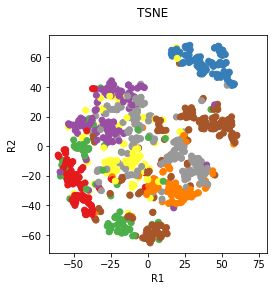

In [43]:
scatterplot_2D(R_TSNE, 'TSNE', y_test[::10])

For this small network the result is reasonable. Comparing with PCA the limitations of this mdoest amount of training becomes clear:

In [38]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=64).fit(X_train.reshape((60000,784)))
X_test_pca = pca.transform(X_test.reshape((10000,784)))

In [40]:
R_TSNE = sklearn.manifold.TSNE(n_components=2, perplexity=10.0).fit_transform(X_test_pca[::10,:])

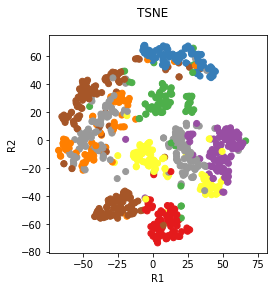

In [41]:
scatterplot_2D(R_TSNE, 'TSNE', y_test[::10])

### Building a model on the NIH HPC

The [high performance computing group at NIH](https://hpc.nih.gov/) provides GPU equipped nodes on their GPU partition. This is an easy way to begin leveraging GPUs without the startup costs and maintainance requirements. 

Utilizing these nodes is relatively straightforward as long as you can connect to the Biowulf cluster.

### Building a model on the Amazon EC2 service

If you don't have access to the NIH HPC resources and don't want to buy a GPU there are a number of [cloud services](http://www.nvidia.com/object/gpu-cloud-computing-services.html) with GPU enabled machines available for rent. Probably the most well known service is Amazon Web services, and specifically their [EC2 service](https://aws.amazon.com/ec2).

Anyone (willing to pay) can use these services.